In [1]:
# Import libraries
# https://briandew.wordpress.com/2016/04/09/oil-price-data-with-python/
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import from Quandl WTI crude oil price data
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url, index_col=0, parse_dates=True)
wticl1.sort_index(inplace=True)
wticl1_last = wticl1['Last']
wticl1['PctCh'] = wticl1.Last.pct_change()

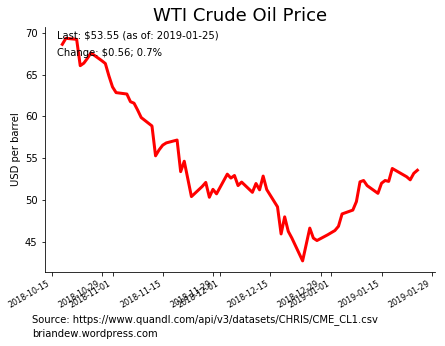

In [3]:
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = wticl1_last.tail(68).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price', fontsize=18)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
fig.text(0.15, 0.85,'Last: $' + str(wticl1.Last[-1])\
         + ' (as of: ' \
         + str(wticl1.index[-1].strftime('%Y-%m-%d'))\
         + ')');
fig.text(0.15, 0.80,'Change: $' + str(wticl1.Change[-1])\
         + '; ' \
         + str((np.round((wticl1.PctCh[-1] * 100), \
         decimals=2))) + '%')
fig.text(0.1, 0.06, 'Source: ' + url)
fig.text(0.1, 0.02, 'briandew.wordpress.com')
plt.savefig('oil.png', dpi=1000)